source : https://towardsdatascience.com/masked-language-modelling-with-bert-7d49793e5d2c


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.5 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

text = ("After Abraham Lincoln won the November 1860 presidential "
        "election on an anti-slavery platform, an initial seven "
        "slave states declared their secession from the country "
        "to form the Confederacy. War broke out in April 1861 "
        "when secessionist forces attacked Fort Sumter in South "
        "Carolina, just over a month after Lincoln's "
        "inauguration.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
inputs = tokenizer(text, return_tensors='pt')

In [ ]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
inputs

{'input_ids': tensor([[  101,  2044,  8181,  5367,  2180,  1996,  2281,  7313,  4883,  2602,
          2006,  2019,  3424,  1011,  8864,  4132,  1010,  2019,  3988,  2698,
          6658,  2163,  4161,  2037, 22965,  2013,  1996,  2406,  2000,  2433,
          1996, 18179,  1012,  2162,  3631,  2041,  1999,  2258,  6863,  2043,
         22965,  2923,  2749,  4457,  3481,  7680,  3334,  1999,  2148,  3792,
          1010,  2074,  2058,  1037,  3204,  2044,  5367,  1005,  1055, 17331,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
inputs['labels'] = inputs.input_ids.detach().clone()

In [ ]:
inputs

{'input_ids': tensor([[  101,  2044,  8181,  5367,  2180,  1996,  2281,  7313,  4883,  2602,
          2006,  2019,  3424,  1011,  8864,  4132,  1010,  2019,  3988,  2698,
          6658,  2163,  4161,  2037, 22965,  2013,  1996,  2406,  2000,  2433,
          1996, 18179,  1012,  2162,  3631,  2041,  1999,  2258,  6863,  2043,
         22965,  2923,  2749,  4457,  3481,  7680,  3334,  1999,  2148,  3792,
          1010,  2074,  2058,  1037,  3204,  2044,  5367,  1005,  1055, 17331,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([

In [ ]:
# create random array of floats in equal dimension to input_ids
rand = torch.rand(inputs.input_ids.shape)
# where the random array is less than 0.15, we set true
mask_arr = rand < 0.15
mask_arr

tensor([[False, False,  True, False, False,  True, False,  True, False, False,
          True, False, False, False, False,  True, False,  True, False,  True,
         False, False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,  True,
         False, False, False, False, False,  True, False,  True, False,  True,
         False, False, False, False, False,  True, False,  True, False,  True,
         False, False]])

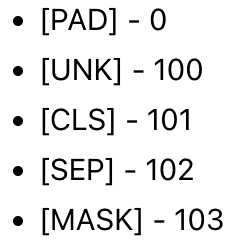

In [ ]:
(inputs.input_ids != 101) * (inputs.input_ids != 102)

tensor([[False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True, False]])

In [ ]:
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * (inputs.input_ids != 102)
mask_arr

tensor([[False, False,  True, False, False,  True, False,  True, False, False,
          True, False, False, False, False,  True, False,  True, False,  True,
         False, False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,  True,
         False, False, False, False, False,  True, False,  True, False,  True,
         False, False, False, False, False,  True, False,  True, False,  True,
         False, False]])

In [ ]:
# create selection from mask_arr
selection = torch.flatten((mask_arr[0]).nonzero()).tolist()
selection

[2, 5, 7, 10, 15, 17, 19, 31, 39, 45, 47, 49, 55, 57, 59]

In [ ]:
# apply selection index to inputs.input_ids, adding MASK tokens
inputs.input_ids[0, selection] = 103

In [ ]:
inputs

{'input_ids': tensor([[  101,  2044,   103,  5367,  2180,   103,  2281,   103,  4883,  2602,
           103,  2019,  3424,  1011,  8864,   103,  1010,   103,  3988,   103,
          6658,  2163,  4161,  2037, 22965,  2013,  1996,  2406,  2000,  2433,
          1996,   103,  1012,  2162,  3631,  2041,  1999,  2258,  6863,   103,
         22965,  2923,  2749,  4457,  3481,   103,  3334,   103,  2148,   103,
          1010,  2074,  2058,  1037,  3204,   103,  5367,   103,  1055,   103,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([

In [ ]:
# pass inputs as kwarg to model
outputs = model(**inputs)

In [ ]:
# we get two output tensors, loss and logits
outputs.keys()

odict_keys(['loss', 'logits'])

In [ ]:
outputs.loss

tensor(0.8773, grad_fn=<NllLossBackward0>)